In [20]:
import numpy as np
import random
import re
import requests
import pandas as pd
from datetime import datetime, timedelta
from datetime import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from ipywidgets import widgets
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.compose import ColumnTransformer

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [21]:
max_data_date = datetime(2021, 10, 6)
ave_data_min = datetime(2021, 10, 7)
ave_data_max = datetime(2022, 10, 7)

In [22]:
#Get best weather and wind chill data
df_weather = pd.read_csv("VisualCrossingWeather.csv")
df_weather['date'] = pd.to_datetime(df_weather['Date time'])
df_weather = df_weather[df_weather['date'] < ave_data_min]
df_weather['Wind Chill'] = df_weather['Wind Chill'].fillna(df_weather['Minimum Temperature'])
df_weather['Precipitation'] = df_weather['Precipitation'].fillna(0.0)
df_weather['Snow'] = df_weather['Snow'].fillna(0.00)
df_weather['Heat Index'] = df_weather['Heat Index'].fillna(0.00)
df_weather['Snow Depth'] = df_weather['Snow Depth'].fillna(0.00)
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['day_of_year'] = df_weather.apply(lambda row: (row.date.day_of_year), axis=1)
df_weather['day'] = df_weather.apply(lambda row: int(row.date.day), axis=1)
df_weather['month'] = df_weather.apply(lambda row: int(row.date.month), axis=1)
df_weather['day_of_year_code'] = df_weather['month']*100 + df_weather['day']

df_ave_weather = df_weather.copy().groupby('day_of_year').mean()

new_dates = pd.date_range(start=ave_data_min,
                  end=ave_data_max,
                 freq='1d')
day_column = new_dates.day_of_year
day_column = new_dates.day_of_year
d = {'date':new_dates,'day_of_year':day_column}
df_future = pd.DataFrame(d)
df_future = df_future.merge(df_ave_weather, how='left', left_on='day_of_year', right_on='day_of_year')

df_wind = df_weather.copy()[['date', 'Wind Chill', 'Minimum Temperature', 'Maximum Temperature',
                           'Temperature', 'Precipitation', 'Snow']]

df_wind['Alert'] = 1.0
df_wind['Alert'][df_wind['Wind Chill'] > 32] = 0
df_wind = df_wind.dropna()

df_future['Alert'] = 1.0
df_future['Alert'][df_future['Wind Chill'] > 32] = 0

df_future['Total'] = 10000
df_future['Male'] = 100
df_future['Female'] = 100
df_future['dayWeek'] = df_future.apply(lambda row: int(row.date.day_of_week + 1), axis=1)
df_future['year'] = df_future.apply(lambda row: int(row.date.year), axis=1)
df_future['month'] = df_future.apply(lambda row: int(row.date.month), axis=1)
df_future['day'] = df_future.apply(lambda row: int(row.date.day), axis=1)
df_future = df_future.dropna()


df_future.head(-1)

C:\Users\klkry\AppData\Local\Temp/ipykernel_6500/576908095.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\klkry\AppData\Local\Temp/ipykernel_6500/576908095.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,day_of_year,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,...,Relative Humidity,day,month,day_of_year_code,Alert,Total,Male,Female,dayWeek,year
0,2021-10-07,280,77.278571,58.942857,67.500000,58.835714,24.935714,0.096429,0.0,0.0,...,69.960000,7,10,1006.714286,0.0,10000,100,100,4,2021
1,2021-10-08,281,74.357143,58.514286,65.907143,58.100000,19.100000,0.009286,0.0,0.0,...,67.830714,8,10,1007.714286,0.0,10000,100,100,5,2021
2,2021-10-09,282,75.121429,59.585714,66.628571,59.350000,31.171429,0.105714,0.0,0.0,...,69.514286,9,10,1008.714286,0.0,10000,100,100,6,2021
3,2021-10-10,283,73.907143,58.778571,65.814286,58.300000,24.114286,0.148571,0.0,0.0,...,68.658571,10,10,1009.714286,0.0,10000,100,100,7,2021
4,2021-10-11,284,71.628571,57.757143,64.307143,57.457143,12.371429,0.315000,0.0,0.0,...,69.887857,11,10,1010.714286,0.0,10000,100,100,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-10-02,275,74.220000,57.713333,65.326667,57.326667,18.020000,0.102667,0.0,0.0,...,72.880667,2,10,1001.733333,0.0,10000,100,100,7,2022
361,2022-10-03,276,72.953333,60.213333,66.080000,59.653333,28.246667,0.072000,0.0,0.0,...,75.486000,3,10,1002.733333,0.0,10000,100,100,1,2022
362,2022-10-04,277,74.713333,58.993333,66.686667,58.746667,29.046667,0.038667,0.0,0.0,...,70.472667,4,10,1003.733333,0.0,10000,100,100,2,2022
363,2022-10-05,278,73.680000,57.900000,65.246667,56.906667,22.413333,0.000667,0.0,0.0,...,67.719333,5,10,1004.733333,0.0,10000,100,100,3,2022


In [23]:
#This is a shelter we need to remove from Total, Male, and Female columns:
df_coh = pd.read_csv("InShelterPerDay_Gender_Shelter_10-06-2021.csv")
df_coh['date'] = pd.to_datetime(df_coh['date'])
mask = (df_coh['name'] == 'COH - The Triumph - DHS STFH - ES FAM - DHS Direct')
df_coh = df_coh[['date','Male', 'Female','name']].loc[mask]
df_coh = df_coh.rename(columns={"Male": "Male_COH", "Female": "Female_COH"})
df_coh['Total_COH'] = df_coh['Male_COH'] + df_coh['Female_COH']
df_coh = df_coh.drop(columns=['name'])

df_ken = pd.read_csv("InShelterPerDay_Gender_Shelter_10-06-2021.csv")
df_ken['date'] = pd.to_datetime(df_ken['date'])
mask = (df_ken['name'] == 'NCCF - The Kennedy - DHS STFH - ES FAM - DHS Direct')
df_ken = df_ken[['date','Male', 'Female','name']].loc[mask]
df_ken = df_ken.rename(columns={"Male": "Male_KEN", "Female": "Female_KEN"})
df_ken['Total_KEN'] = df_ken['Male_KEN'] + df_ken['Female_KEN']
df_ken = df_ken.drop(columns=['name'])

In [24]:
#Remove COH and Ken shelters from gendered data

df_use = pd.read_csv("InShelterPerDayGender-10-16-2021.csv")
df_use['date'] = pd.to_datetime(df_use['date'])

df_use['Total'] = df_use['Male'] + df_use['Female']

df_use = df_use.merge(df_coh, how='left', left_on='date', right_on='date')
df_use['Total'] = df_use['Total'] - df_use['Total_COH']
df_use['Male'] = df_use['Male'] - df_use['Male_COH']
df_use['Female'] = df_use['Female'] - df_use['Female_COH']
df_use = df_use.drop(columns=['Total_COH', 'Male_COH', 'Female_COH', 'NA', 'Transgender'])

df_use = df_use.merge(df_ken, how='left', left_on='date', right_on='date')
df_use['Total'] = df_use['Total'] - df_use['Total_KEN']
df_use['Male'] = df_use['Male'] - df_use['Male_KEN']
df_use['Female'] = df_use['Female'] - df_use['Female_KEN']
df_use = df_use.drop(columns=['Total_KEN', 'Male_KEN', 'Female_KEN'])


#Add Temperature and Windchill data
df_use = df_use.merge(df_wind, how='left', left_on='date', right_on='date')
df_use['date'] = pd.to_datetime(df_use['date'])
df_use = df_use[df_use['date'] > datetime(2007, 1, 1)]
df_use = df_use.drop(columns=['MinTempF', 'MaxTempF', 'SnowIn', 'PrecipIn'])


df_use = pd.concat([df_use, df_future])

df_use['day_of_year'] = df_use.apply(lambda row: (row.date.day_of_year), axis=1)
df_use['day_of_year_code'] = 100*df_use['month'] + df_use['day']
df_use = df_use[df_use['day_of_year_code'] != 229] #drop leap year day
df_use.loc[df_use.date >= max_data_date, "Total"] = 1101
df_use.loc[df_use.date >= max_data_date, "Male"] = 100
df_use.loc[df_use.date >= max_data_date, "Female"] = 100
df_use['day'] = df_use.apply(lambda row: int(row.date.day), axis=1)
df_use['month'] = df_use.apply(lambda row: int(row.date.month), axis=1)
df_use['year'] = df_use.apply(lambda row: int(row.date.year), axis=1)
df_use['dayWeek'] = df_use.apply(lambda row: int(row.date.day_of_week + 1), axis=1)
df_use['day_of_year'] = df_use.apply(lambda row: (row.date.day_of_year), axis=1)
df_use['day_of_year_code'] = 100*df_use['month'] + df_use['day']
df_use['day_of_year_code'][df_use['day_of_year_code'] == 229] = 228

df_use['Hypo'] = 0.0
df_use['Hypo'][df_use['month'] < 3] = 1.0
df_use['Hypo'][df_use['month'] > 11] = 1.0
df_use['FreezingAtEntry'] = 0.0
df_use['FreezingAtEntry'][df_use['Minimum Temperature'] > 32] = 1.0
df_use['prev_min_temp'] = df_use['Minimum Temperature'].shift(1)
df_use = df_use[df_use['date'] > datetime(2010, 1, 1)]
#df_use = df_use.dropna()

#Remove one outlier point:
df_use = df_use[df_use['Total'] >= 1100]

df_use = df_use.drop(['Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility', 'Heat Index', 'Cloud Cover', 'Relative Humidity'], axis=1)


df_use.head(-363)

C:\Users\klkry\AppData\Local\Temp/ipykernel_6500/1838753834.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\klkry\AppData\Local\Temp/ipykernel_6500/1838753834.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\klkry\AppData\Local\Temp/ipykernel_6500/1838753834.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\klkry\AppData\Local\Temp/ipykernel_6500/1838753834.py:48: SettingWithCopyWarning:


A value

,date,Female,Male,dayWeek,month,day,year,FreezingAtEntry,Total,Wind Chill,Minimum Temperature,Maximum Temperature,Temperature,Precipitation,Snow,Alert,day_of_year,day_of_year_code,Hypo,prev_min_temp
1827,2010-01-02,262.0,1229.0,6,1,2,2010,0.0,1491.0,4.900000,20.900000,28.600000,26.300000,0.070000,0.0,1.0,2,102,1.0,29.900000
1828,2010-01-03,267.0,1247.0,7,1,3,2010,0.0,1514.0,-1.000000,15.900000,28.100000,21.900000,0.110000,0.0,1.0,3,103,1.0,20.900000
1829,2010-01-04,269.0,1302.0,1,1,4,2010,0.0,1571.0,10.200000,22.900000,33.700000,27.700000,0.000000,0.0,1.0,4,104,1.0,15.900000
1830,2010-01-05,273.0,1302.0,2,1,5,2010,0.0,1575.0,15.800000,26.600000,36.900000,30.400000,0.000000,0.0,1.0,5,105,1.0,22.900000
1831,2010-01-06,285.0,1309.0,3,1,6,2010,0.0,1594.0,17.600000,28.600000,37.500000,32.200000,0.000000,0.0,1.0,6,106,1.0,26.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,2021-10-05,388.0,1057.0,2,10,5,2021,1.0,1445.0,68.600000,68.600000,82.800000,73.200000,0.000000,0.0,0.0,278,1005,0.0,69.900000
6122,2021-10-06,100.0,100.0,3,10,6,2021,1.0,1101.0,67.600000,67.600000,71.800000,69.700000,0.020000,0.0,0.0,279,1006,0.0,68.600000
0,2021-10-07,100.0,100.0,4,10,7,2021,1.0,1101.0,58.835714,58.942857,77.278571,67.500000,0.096429,0.0,0.0,280,1007,0.0,67.600000
1,2021-10-08,100.0,100.0,5,10,8,2021,1.0,1101.0,58.100000,58.514286,74.357143,65.907143,0.009286,0.0,0.0,281,1008,0.0,58.942857


In [25]:
#Add Homeless population data and Metrobus usage:
df_use["dc_pop"] =  "582049"
df_use.loc[df_use.date >= datetime(2004, 6, 1), "dc_pop"] = "582049"
df_use.loc[df_use.date >= datetime(2005, 6, 1), "dc_pop"] = "585171"
df_use.loc[df_use.date >= datetime(2006, 6, 1), "dc_pop"] = "588292"
df_use.loc[df_use.date >= datetime(2007, 6, 1), "dc_pop"] = "588363"
df_use.loc[df_use.date >= datetime(2008, 6, 1), "dc_pop"] = "588433"
df_use.loc[df_use.date >= datetime(2009, 6, 1), "dc_pop"] = "605125"
df_use.loc[df_use.date >= datetime(2010, 6, 1), "dc_pop"] = "619624"
df_use.loc[df_use.date >= datetime(2011, 6, 1), "dc_pop"] = "633427"
df_use.loc[df_use.date >= datetime(2012, 6, 1), "dc_pop"] = "646669"
df_use.loc[df_use.date >= datetime(2013, 6, 1), "dc_pop"] = "658893"
df_use.loc[df_use.date >= datetime(2014, 6, 1), "dc_pop"] = "672228"
df_use.loc[df_use.date >= datetime(2015, 6, 1), "dc_pop"] = "681170"
df_use.loc[df_use.date >= datetime(2016, 6, 1), "dc_pop"] = "693972"
df_use.loc[df_use.date >= datetime(2017, 6, 1), "dc_pop"] = "702455"
df_use.loc[df_use.date >= datetime(2018, 6, 1), "dc_pop"] = "705749"
df_use.loc[df_use.date >= datetime(2019, 6, 1), "dc_pop"] = "689545"
df_use.loc[df_use.date >= datetime(2020, 6, 1), "dc_pop"] = "690345"
df_use["dc_pop"] = pd.to_numeric(df_use["dc_pop"])

df_use["homeless_pop"] = "3200"
df_use.loc[df_use.date >= datetime(2011, 1, 21), "homeless_pop"] = 3228
df_use.loc[df_use.date >= datetime(2012, 1, 21), "homeless_pop"] = 3233
df_use.loc[df_use.date >= datetime(2013, 1, 21), "homeless_pop"] = 3128
df_use.loc[df_use.date >= datetime(2014, 4, 21), "homeless_pop"] = 3072
df_use.loc[df_use.date >= datetime(2015, 4, 21), "homeless_pop"] = 2889
df_use.loc[df_use.date >= datetime(2016, 4, 21), "homeless_pop"] = 2912
df_use.loc[df_use.date >= datetime(2017, 4, 21), "homeless_pop"] = 3156
df_use.loc[df_use.date >= datetime(2018, 4, 21), "homeless_pop"] = 3224
df_use.loc[df_use.date >= datetime(2019, 4, 21), "homeless_pop"] = 2971
df_use.loc[df_use.date >= datetime(2020, 4, 21), "homeless_pop"] = 2845
df_use.loc[df_use.date >= datetime(2021, 4, 21), "homeless_pop"] = 2936
df_use["homeless_pop"] = pd.to_numeric(df_use["homeless_pop"])

df_use["MetroBus"] = "0.46" #in millions of daily rides (mid-year ave.)
df_use.loc[df_use.date >= datetime(2000, 1, 1), "MetroBus"] = "0.46"
df_use.loc[df_use.date >= datetime(2015, 1, 1), "MetroBus"] = "0.44"
df_use.loc[df_use.date >= datetime(2016, 1, 1), "MetroBus"] = "0.41"
df_use.loc[df_use.date >= datetime(2017, 1, 1), "MetroBus"] = "0.37"
df_use.loc[df_use.date >= datetime(2018, 1, 1), "MetroBus"] = "0.36"
df_use.loc[df_use.date >= datetime(2019, 1, 1), "MetroBus"] = "0.35"
df_use.loc[df_use.date >= datetime(2020, 1, 1), "MetroBus"] = "0.35"
df_use.loc[df_use.date >= datetime(2020, 3, 1), "MetroBus"] = "0.18"
df_use.loc[df_use.date >= datetime(2020, 4, 1), "MetroBus"] = "0.0"
df_use.loc[df_use.date >= datetime(2020, 5, 1), "MetroBus"] = "0.02"
df_use.loc[df_use.date >= datetime(2020, 6, 1), "MetroBus"] = "0.02"
df_use.loc[df_use.date >= datetime(2020, 7, 1), "MetroBus"] = "0.03"
df_use.loc[df_use.date >= datetime(2020, 8, 1), "MetroBus"] = "0.03"
df_use.loc[df_use.date >= datetime(2020, 9, 1), "MetroBus"] = "0.04"
df_use.loc[df_use.date >= datetime(2020, 10, 1), "MetroBus"] = "0.04"
df_use.loc[df_use.date >= datetime(2020, 11, 1), "MetroBus"] = "0.04"
df_use.loc[df_use.date >= datetime(2020, 12, 1), "MetroBus"] = "0.04"
df_use.loc[df_use.date >= datetime(2021, 1, 1), "MetroBus"] = "0.11"
df_use.loc[df_use.date >= datetime(2021, 2, 1), "MetroBus"] = "0.10"
df_use.loc[df_use.date >= datetime(2021, 3, 1), "MetroBus"] = "0.12"
df_use.loc[df_use.date >= datetime(2021, 4, 1), "MetroBus"] = "0.12"
df_use.loc[df_use.date >= datetime(2021, 5, 1), "MetroBus"] = "0.13"
df_use.loc[df_use.date >= datetime(2021, 6, 1), "MetroBus"] = "0.14"
df_use.loc[df_use.date >= datetime(2021, 7, 1), "MetroBus"] = "0.14"
df_use.loc[df_use.date >= datetime(2021, 8, 1), "MetroBus"] = "0.15"
df_use.loc[df_use.date >= datetime(2021, 9, 1), "MetroBus"] = "0.12"
df_use.loc[df_use.date >= datetime(2021, 10, 1), "MetroBus"] = "0.23"
df_use["MetroBus"] = pd.to_numeric(df_use["MetroBus"])

df_use.head(-1)

,date,Female,Male,dayWeek,month,day,year,FreezingAtEntry,Total,Wind Chill,...,Precipitation,Snow,Alert,day_of_year,day_of_year_code,Hypo,prev_min_temp,dc_pop,homeless_pop,MetroBus
1827,2010-01-02,262.0,1229.0,6,1,2,2010,0.0,1491.0,4.900000,...,0.070000,0.0,1.0,2,102,1.0,29.900000,605125,3200,0.46
1828,2010-01-03,267.0,1247.0,7,1,3,2010,0.0,1514.0,-1.000000,...,0.110000,0.0,1.0,3,103,1.0,20.900000,605125,3200,0.46
1829,2010-01-04,269.0,1302.0,1,1,4,2010,0.0,1571.0,10.200000,...,0.000000,0.0,1.0,4,104,1.0,15.900000,605125,3200,0.46
1830,2010-01-05,273.0,1302.0,2,1,5,2010,0.0,1575.0,15.800000,...,0.000000,0.0,1.0,5,105,1.0,22.900000,605125,3200,0.46
1831,2010-01-06,285.0,1309.0,3,1,6,2010,0.0,1594.0,17.600000,...,0.000000,0.0,1.0,6,106,1.0,26.600000,605125,3200,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-10-02,100.0,100.0,7,10,2,2022,1.0,1101.0,57.326667,...,0.102667,0.0,0.0,275,1002,0.0,57.993333,690345,2936,0.23
361,2022-10-03,100.0,100.0,1,10,3,2022,1.0,1101.0,59.653333,...,0.072000,0.0,0.0,276,1003,0.0,57.713333,690345,2936,0.23
362,2022-10-04,100.0,100.0,2,10,4,2022,1.0,1101.0,58.746667,...,0.038667,0.0,0.0,277,1004,0.0,60.213333,690345,2936,0.23
363,2022-10-05,100.0,100.0,3,10,5,2022,1.0,1101.0,56.906667,...,0.000667,0.0,0.0,278,1005,0.0,58.993333,690345,2936,0.23


In [26]:
start = date(2005, 1, 1)
df_use['diff_date'] = df_use.apply(lambda row: (date(row.year, row.month, row.day) - start), axis=1)
df_use['Julian'] = pd.to_numeric(df_use['diff_date'].dt.days, downcast='integer')
df_use['sin(year)'] = np.sin(df_use['Julian'] / 365.25 * 2 * np.pi)
df_use['cos(year)'] = np.cos(df_use['Julian'] / 365.25 * 2 * np.pi)

df_use.head(-1)

,date,Female,Male,dayWeek,month,day,year,FreezingAtEntry,Total,Wind Chill,...,day_of_year_code,Hypo,prev_min_temp,dc_pop,homeless_pop,MetroBus,diff_date,Julian,sin(year),cos(year)
1827,2010-01-02,262.0,1229.0,6,1,2,2010,0.0,1491.0,4.900000,...,102,1.0,29.900000,605125,3200,0.46,1827 days,1827,0.012901,0.999917
1828,2010-01-03,267.0,1247.0,7,1,3,2010,0.0,1514.0,-1.000000,...,103,1.0,20.900000,605125,3200,0.46,1828 days,1828,0.030100,0.999547
1829,2010-01-04,269.0,1302.0,1,1,4,2010,0.0,1571.0,10.200000,...,104,1.0,15.900000,605125,3200,0.46,1829 days,1829,0.047289,0.998881
1830,2010-01-05,273.0,1302.0,2,1,5,2010,0.0,1575.0,15.800000,...,105,1.0,22.900000,605125,3200,0.46,1830 days,1830,0.064464,0.997920
1831,2010-01-06,285.0,1309.0,3,1,6,2010,0.0,1594.0,17.600000,...,106,1.0,26.600000,605125,3200,0.46,1831 days,1831,0.081621,0.996663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-10-02,100.0,100.0,7,10,2,2022,1.0,1101.0,57.326667,...,1002,0.0,57.993333,690345,2936,0.23,6483 days,6483,-0.999995,-0.003225
361,2022-10-03,100.0,100.0,1,10,3,2022,1.0,1101.0,59.653333,...,1003,0.0,57.713333,690345,2936,0.23,6484 days,6484,-0.999902,0.013977
362,2022-10-04,100.0,100.0,2,10,4,2022,1.0,1101.0,58.746667,...,1004,0.0,60.213333,690345,2936,0.23,6485 days,6485,-0.999514,0.031174
363,2022-10-05,100.0,100.0,3,10,5,2022,1.0,1101.0,56.906667,...,1005,0.0,58.993333,690345,2936,0.23,6486 days,6486,-0.998830,0.048363


In [27]:
#import dill
#from dill import dumps, loads
#dill.dump(df_use, open('df_use.pkd', 'wb'))
#df_use = dill.load(open('df_use.pkd', 'rb'))

In [28]:
#df_use = dill.load(open('df_use.pkd', 'rb'))

In [29]:
test_start_date = datetime(2019, 11, 15)
test_end_date = datetime(2020, 4, 1)
train_start_date = datetime(2014, 8, 1)
train_end_date = datetime(2019, 8, 1)

def reduce_XY(time_start, time_finish, min_temp, max_temp, X_columns, Population_type, df_chosen):
    
    df_reduced = df_chosen.copy()
    leapyear_year = time_finish.year
    if leapyear_year%4 == 0:
        leap_date = datetime(leapyear_year, 2, 29)
        df_reduced = df_reduced[df_reduced['date'] != leap_date]
    df_reduced[Population_type] = df_reduced[Population_type] / df_reduced['homeless_pop']
    mask = (df_reduced['date'] >= time_start) & (df_reduced['date'] < time_finish) & (df_reduced['Minimum Temperature'] >= min_temp) & (df_reduced['Minimum Temperature'] < max_temp)
    df_reduced = df_reduced.copy().loc[mask]
    y = df_reduced.copy()[Population_type]
    df_reduced = df_reduced[X_columns]
    scale_by = df_reduced['homeless_pop'].tolist()
    
    return df_reduced['date'], y, scale_by

In [30]:
from datetime import datetime as dt
from datetime import date
import numpy as np

def reduce_dataframe(time_start, time_finish, min_temp, max_temp, X_columns, Population_type, df_chosen):
    
    df_reduced = df_chosen.copy()
    df_reduced[Population_type] = df_reduced[Population_type] / df_reduced['homeless_pop']
    mask = (df_reduced['date'] >= time_start) & (df_reduced['date'] < time_finish) & (df_reduced['Minimum Temperature'] >= min_temp) & (df_reduced['Minimum Temperature'] < max_temp)
    df_reduced = df_reduced.copy().loc[mask]
    y = df_reduced.copy()[Population_type]
    df_reduced = df_reduced[X_columns]
    scale_by = df_reduced['homeless_pop'].tolist()
    
    return df_reduced, y, scale_by


def temp_modeling(time_start, time_finish, min_temp, max_temp, X_columns, categorical_columns, numerical_columns, Population_type, df_chosen):

    X_train, y_train, scale_by = reduce_dataframe(time_start, time_finish, min_temp, max_temp, X_columns, Population_type, df_chosen)

    preplowT = ColumnTransformer([
        ('categorical', OneHotEncoder(), categorical_columns),
        ('numeric', 'passthrough', numerical_columns),
        ('standard_scaler', StandardScaler(), numerical_columns),
        ('polynomial_trans', PolynomialFeatures(1), numerical_columns)
    ])
    model_byTemp = Pipeline([
        ('features', preplowT),
        ('regressor', RandomForestRegressor(max_depth=5, random_state=42)) #max depth 10
    ])

    model = model_byTemp.fit(X_train,y_train)
    #y_pred_train = scale_by*model_lowT.predict(X_train)
    #print('R2', model_lowT.score(X_train,y_train))
    #y_pred_test = scale_by*model_lowT.predict(X_test)
    
    return model, scale_by

Population_type = 'Total'
#test_start_date = datetime(2019, 11, 15) #inclusive datetime(2019, 3, 1)
#test_end_date = datetime(2020, 4, 1) #not inclusive datetime(2020, 3, 1)
train_start_date = datetime(2014, 8, 1)
train_end_date = datetime(2019, 8, 1)
X_columns = ['date', 'dayWeek', 'homeless_pop', 'day_of_year', 'sin(year)', 'cos(year)', 'Wind Chill', 'Minimum Temperature', 'MetroBus', 'day_of_year', 'prev_min_temp', 'Snow', 'Precipitation']
categorical_columns = [X_columns[1]]
numerical_columns = X_columns[2:]


In [39]:
#Code for computing statistics

def compute_R2(y_pred1, y_pred2, y_true1, y_true2):
    
    y_train = []
    y_ave = 0
    for item in y_true2:
        y_train.append(item)
        y_ave += item
    for item in y_true1:
        y_train.append(item)
        y_ave += item
    y_ave = y_ave/(1.0*len(y_train))

    y_pred = []
    pred_ave =0
    for item in y_pred2:
        y_pred.append(item*1.0)
        pred_ave += item
    for item in y_pred1:
        y_pred.append(item*1.0)
        pred_ave += item
    pred_ave = pred_ave/(1.0*len(y_pred))

    diff_num = 0
    diff_denom= 0
    for i in range(0, len(y_train)):
        diff_num += (y_train[i] - y_pred[i])*(y_train[i] - y_pred[i])
        diff_denom += (y_train[i] - y_ave)*(y_train[i] - y_ave)

    R2= 1.0 - (diff_num / diff_denom)
    
    pred_diff = []
    std_diff = []
    for i in range(0,len(y_pred)):
        pred_diff.append(y_pred[i] - y_train[i])
        if y_pred[i] - y_train[i] < 200:
            std_diff.append(np.power(y_pred[i] - y_train[i],2))
        
    pred_bin = np.array(pred_diff)
    std = np.sqrt(sum(std_diff)/(1.0*len(y_pred)))

    return R2, std, y_ave, pred_ave, pred_bin

def plot_errors(showplot, name1, name2, color1, color2, y_pred_train1, y_pred_train2, y_true_train1, y_true_train2, y_pred_test1, y_pred_test2, y_true_test1, y_true_test2):

    R2_train, std_train, true_ave_train, pred_ave_train, train_bin = compute_R2(y_pred_train1, y_pred_train2, y_true_train1, y_true_train2)  
    R2_test, std_test, true_ave_test, pred_ave_test, test_bin = compute_R2(y_pred_test1, y_pred_test2, y_true_test1, y_true_test2)  
    
    print(name1, 'standard deviation =', round(std_train,2), " (calculated / true average =", round(pred_ave_train,2), "/", round(true_ave_train,2), "and R^2 =", round(R2_train,2), ")")
    print(name2, 'standard deviation =', round(std_test,2), " (calculated / true average =", round(pred_ave_test,2), "/", round(true_ave_test,2), "and R^2 =", round(R2_test,2), ")")
    
    if showplot > 0:
        fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, tight_layout=True)
        # We can set the number of bins with the `bins` kwarg
        axs[0].hist(train_bin, bins=25, color=color1)
        axs[1].hist(test_bin, bins=25, color=color2)
        xlab1 = name1 + " - Actual Beds"
        xlab2 = name2 + " - Actual Beds"
        axs[0].set(xlabel=xlab1,ylabel="Number of Occurences")
        axs[1].set(xlabel=xlab2,ylabel="Number of Occurences")
        plt.show()
        
        '''
        df_train = pd.DataFrame(data = train_bin, columns = ['date'])
        df_train = pd.DataFrame(data = train_bin, columns = ['date'])
        df_test = pd.DataFrame(data = test_bin, columns = ['date'])
        x_label1 = name1 + " - Actual Beds"
        x_label2 = name2 + " - Actual Beds"
    
        x_label1 = name1 + " Model"
        x_label2 = name2 + " Model"
        extra1 = "$\sigma = {:.2f}$".format(std_train)
        extra2 = "$\sigma = {:.2f}$".format(std_test)
        fig = make_subplots(rows=1, cols=2, subplot_titles=(x_label1, x_label2), y_title='Counts', x_title = 'Predicted - Actual')

        fig.add_trace(
            go.Histogram(x=df_train['date'], opacity=0.9, marker=dict(color='red'), name = extra1),
            row=1, col=1
        )

        fig.add_trace(
            go.Histogram(x=df_test['date'], opacity=0.9, marker=dict(color='green'), name = extra2),
            row=1, col=2
        )

        fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
        fig.show()
        '''
        
        #Or for seperate histogram plots on Heroku:
        #data1 = [go.Histogram(x=df_train['date'], opacity=0.4, marker=dict(color='red'))]
        #layout1 = go.Layout(barmode='overlay', title=name1, yaxis_title='Number of Occurences', xaxis_title=x_label1)
        #fig1 = go.Figure({"data": data1, "layout": layout1})
        #fig1.show()
        #data2 = [go.Histogram(x=df_test['date'], opacity=0.4, marker=dict(color='green'))]
        #layout2 = go.Layout(barmode='overlay', title=name2, yaxis_title='Number of Occurences', xaxis_title=x_label2)
        #fig2 = go.Figure({"data": data2, "layout": layout2})
        #fig2.show()
    
    return

In [40]:
#Define how to deal with year in advance predictions
def SeasonPredictions(winter_test_year, Population_type):


    test_start_date = datetime(winter_test_year, 8, 1)
    test_end_date = datetime(winter_test_year+1, 4, 1)
    train_start_date = max(datetime(winter_test_year-4, 8, 1), datetime(2015, 8, 1))
    if Population_type == 'Female':
        train_start_date = max(datetime(winter_test_year-4, 8, 1), datetime(2016, 8, 1))
    train_end_date = test_start_date
    train_end_date = min(test_start_date, max_data_date)

    X_columns = ['date', 'dayWeek', 'homeless_pop', 'sin(year)', 'cos(year)', 'Wind Chill', 'Minimum Temperature', 'MetroBus', 'day_of_year', 'prev_min_temp', 'Snow', 'Precipitation']
    categorical_columns = ['dayWeek']
    numerical_columns = X_columns[2:]
    #numerical_columns = ['homeless_pop', 'sin(year)', 'cos(year)', 'Wind Chill', 'Minimum Temperature', 'MetroBus', 'day_of_year', 'prev_min_temp', 'Snow', 'Precipitation']

    model_lowT, scaleby = temp_modeling(train_start_date, train_end_date, -150, 30, X_columns, categorical_columns, numerical_columns, Population_type, df_use) 
    model_midT, scaleby = temp_modeling(train_start_date, train_end_date, 30, 150, X_columns, categorical_columns, numerical_columns, Population_type, df_use) 

    if test_end_date < max_data_date:
        X_allT, y_true_allT, scale_allT = reduce_dataframe(train_start_date, test_end_date, -150,  150, X_columns, Population_type, df_use)
    else:
        X_allT, y_true_allT, scale_allT = reduce_dataframe(train_start_date, train_end_date, -150,  150, X_columns, Population_type, df_use)
        
    X_train_lowT, y_true_train_lowT, scale_by_train_lowT = reduce_dataframe(train_start_date, train_end_date, -150,  30, X_columns, Population_type, df_use)
    X_train_midT, y_true_train_midT, scale_by_train_midT = reduce_dataframe(train_start_date, train_end_date, 30,  150, X_columns, Population_type, df_use)

    X_test_lowT, y_true_test_lowT, scale_by_test_lowT = reduce_dataframe(test_start_date, test_end_date, -150,  30, X_columns, Population_type, df_use)
    X_test_midT, y_true_test_midT, scale_by_test_midT = reduce_dataframe(test_start_date, test_end_date, 30,  150, X_columns, Population_type, df_use)


    y_predict_train_lowT = model_lowT.predict(X_train_lowT)
    y_predict_train_midT = model_midT.predict(X_train_midT)

    y_predict_test_lowT = model_lowT.predict(X_test_lowT)
    y_predict_test_midT = model_midT.predict(X_test_midT)

    plt.plot(X_allT['date'], y_true_allT*scale_allT, 'o', color='b', label="Shelter Population");
    plt.plot(X_train_lowT['date'], y_predict_train_lowT*scale_by_train_lowT, 'o', color='r', label='Training prediction');
    plt.plot(X_train_midT['date'], y_predict_train_midT*scale_by_train_midT, 'o', color='r');
    plt.plot(X_test_lowT['date'], y_predict_test_lowT*scale_by_test_lowT, 'o', color='c', label='Testing prediction');
    plt.plot(X_test_midT['date'], y_predict_test_midT*scale_by_test_midT, 'o', color='c');
    plt.xlabel('Date')
    plt.ylabel('Shelter beds utilized');
    plt.legend();
    plt.show()

    '''
    df_allT = pd.DataFrame(list(zip(X_allT['date'], y_true_allT*scale_allT)), columns =['date', 'Total'])
    df_train_lowT = pd.DataFrame(list(zip(X_train_lowT['date'], y_predict_train_lowT*scale_by_train_lowT)), columns =['date', 'Total'])
    df_train_midT = pd.DataFrame(list(zip(X_train_midT['date'], y_predict_train_midT*scale_by_train_midT)), columns =['date', 'Total'])
    df_test_lowT = pd.DataFrame(list(zip(X_test_lowT['date'], y_predict_test_lowT*scale_by_test_lowT)), columns =['date', 'Total'])
    df_test_midT = pd.DataFrame(list(zip(X_test_midT['date'], y_predict_test_midT*scale_by_test_midT)), columns =['date', 'Total'])
    fig = go.Figure()
    fig.add_traces(go.Scatter(x=df_allT['date'], y = df_allT['Total'], mode = 'lines+markers', marker = {'color' : 'blue'}, name = 'Actual Usage'))
    fig.add_traces(go.Scatter(x=df_train_lowT['date'], y = df_train_lowT['Total'], mode = 'markers', marker = {'color' : 'red'}, name = 'Trained Usage (low temp.)'))
    fig.add_traces(go.Scatter(x=df_train_midT['date'], y = df_train_midT['Total'], mode = 'markers', marker = {'color' : 'red'}, name = 'Trained Usage (mid temp.)'))
    fig.add_traces(go.Scatter(x=df_test_lowT['date'], y = df_test_lowT['Total'], mode = 'markers', marker = {'color' : 'green'}, name = 'Predicted Usage (low temp.)'))
    fig.add_traces(go.Scatter(x=df_test_midT['date'], y = df_test_midT['Total'], mode = 'markers', marker = {'color' : 'green'}, name = 'Predicted Usage (mid temp.)'))
    fig.update_xaxes(title_text = "Date", title_font = {"size": 20}, title_standoff = 25)
    fig.update_yaxes(tickangle = 0, title_text = "DShelter Usage", title_font = {"size": 20}, title_standoff = 25)
    fig.show()
    #st.write(fig)
    '''
    
    if test_end_date < max_data_date :
        name1 = 'Trained'
        name2 = 'Predicted'
        showplot = 1
        plot_errors(showplot, name1, name2, "r", "c", y_predict_train_lowT*scale_by_train_lowT, y_predict_train_midT*scale_by_train_midT, y_true_train_lowT*scale_by_train_lowT, y_true_train_midT*scale_by_train_midT, 
                    y_predict_test_lowT*scale_by_test_lowT, y_predict_test_midT*scale_by_test_midT, y_true_test_lowT*scale_by_test_lowT, y_true_test_midT*scale_by_test_midT)



    test_start_winter = datetime(test_start_date.year, 11, 1)
    test_end_winter = datetime(test_end_date.year, 4, 1)
    prev_start_winter = datetime(test_start_date.year - 1, 11, 1)
    prev_end_winter = datetime(test_end_date.year - 1, 4, 1)

    X_prev_year, y_prev_year, scale_prev_year = reduce_XY(prev_start_winter, prev_end_winter, -150,  150, X_columns, Population_type, df_use)
    X_this_year, y_this_year, scale_this_year = reduce_XY(test_start_winter, test_end_winter, -150,  150, X_columns, Population_type, df_use)

    y_naive = y_prev_year*scale_this_year
    X_test_lowT, y_true_test_lowT, scale_by_test_lowT = reduce_dataframe(test_start_winter, test_end_winter, -150,  30, X_columns, Population_type, df_use)
    X_test_midT, y_true_test_midT, scale_by_test_midT = reduce_dataframe(test_start_winter, test_end_winter, 30,  150, X_columns, Population_type, df_use)
    y_predict_test_lowT = model_lowT.predict(X_test_lowT)
    y_predict_test_midT = model_midT.predict(X_test_midT)
    
    if test_end_winter < max_data_date:
        plt.plot(X_this_year, y_this_year*scale_this_year, 'o', color='b', label="Winter Shelter Population");
    if test_end_winter > max_data_date:
        if test_start_winter < max_data_date:
            X_this_year, y_this_year, scale_this_year = reduce_XY(test_start_winter, max_data_date, -150,  150, X_columns, Population_type, df_use) 
            plt.plot(X_this_year, y_this_year*scale_this_year, 'o', color='b', label="Winter Shelter Population");
    plt.plot(X_test_lowT['date'], y_predict_test_lowT*scale_by_test_lowT, 'o', color='c', label='Training prediction');
    plt.plot(X_test_midT['date'], y_predict_test_midT*scale_by_test_midT, 'o', color='c');
    plt.plot(X_this_year, y_naive, 'o', color='k', label='Naive prediction');
    plt.xlabel('Date')
    plt.ylabel('Shelter beds utilized');
    plt.legend();
    plt.show()

    if test_end_date < max_data_date :

        name2 = 'Naive'
        name1 = 'Predicted'
        showplot = 1
        plot_errors(showplot, name1, name2, "c", "k",
                    y_predict_test_lowT*scale_by_test_lowT, y_predict_test_midT*scale_by_test_midT, y_true_test_lowT*scale_by_test_lowT, y_true_test_midT*scale_by_test_midT,
                   y_naive, [], y_this_year*scale_this_year, [])

    return


In [43]:
#Define short-term prediction process
def TenDayPredictions(start_year, start_month, start_day, Population_type, df_use):
    

    test_start_date = datetime(start_year, start_month, start_day)
    test_end_date = test_start_date + timedelta(days=10)
    
    prev_start_date = datetime(start_year - 1, start_month, start_day)
    prev_end_date = prev_start_date + timedelta(days=10)
    
    train_start_date = max(datetime(start_year-4, start_month, start_day), datetime(2015, 8, 1))
    if Population_type == 'Female':
        train_start_date = max(datetime(start_year-4, start_month, start_month), datetime(2016, 8, 1))
    train_end_date = test_start_date
    train_end_date = min(train_end_date, max_data_date)

    X_columns = ['date', 'dayWeek', 'homeless_pop', 'sin(year)', 'cos(year)', 'Wind Chill', 'Minimum Temperature', 'MetroBus', 'day_of_year', 'prev_min_temp', 'Snow', 'Precipitation']
    categorical_columns = ['dayWeek']
    numerical_columns = X_columns[2:]

    X_allT, y_true_allT, scale_allT = reduce_dataframe(test_start_date, test_end_date, -150,  150, X_columns, Population_type, df_use)

    X_train_lowT, y_true_train_lowT, scale_by_train_lowT = reduce_dataframe(train_start_date, train_end_date, -150,  30, X_columns, Population_type, df_use)
    X_train_midT, y_true_train_midT, scale_by_train_midT = reduce_dataframe(train_start_date, train_end_date, 30,  150, X_columns, Population_type, df_use)

    X_test_lowT, y_true_test_lowT, scale_by_test_lowT = reduce_dataframe(test_start_date, test_end_date, -150,  30, X_columns, Population_type, df_use)
    X_test_midT, y_true_test_midT, scale_by_test_midT = reduce_dataframe(test_start_date, test_end_date, 30,  150, X_columns, Population_type, df_use)

    model_lowT, scaleby = temp_modeling(train_start_date, train_end_date, -150, 30, X_columns, categorical_columns, numerical_columns, Population_type, df_use) 
    model_midT, scaleby = temp_modeling(train_start_date, train_end_date, 30, 150, X_columns, categorical_columns, numerical_columns, Population_type, df_use) 

    y_predict_train_lowT = model_lowT.predict(X_train_lowT)
    y_predict_train_midT = model_midT.predict(X_train_midT)
    
    X_prev_year, y_prev_year, scale_prev_year = reduce_XY(prev_start_date, prev_end_date, -150,  150, X_columns, Population_type, df_use)
    X_this_year, y_this_year, scale_this_year = reduce_XY(test_start_date, test_end_date, -150,  150, X_columns, Population_type, df_use)
    y_naive = y_prev_year*scale_this_year


    if len(X_test_lowT) > 0:
        y_predict_test_lowT = model_lowT.predict(X_test_lowT)
    else:
        y_predict_test_lowT = []
        scale_by_test_lowT = 1
        
    y_predict_test_midT = model_midT.predict(X_test_midT)
    
    
    fig = go.Figure()
    if test_end_date < max_data_date:
        plt.plot(X_allT['date'], y_true_allT*scale_allT, 'o', color='b', label="Shelter Population");
        #df_allT = pd.DataFrame(list(zip(X_allT['date'], y_true_allT*scale_allT)), columns =['date', 'Total'])
        #fig.add_traces(go.Scatter(x=df_allT['date'], y = df_allT['Total'], mode = 'lines+markers', marker = {'color' : 'blue'}, name = 'Actual Usage'))
    elif test_end_date > max_data_date:
        if test_start_date < max_data_date:
            X_allT, y_true_allT, scale_allT = reduce_dataframe(test_start_date, max_data_date, -150,  150, X_columns, Population_type, df_use)
            plt.plot(X_allT['date'], y_true_allT*scale_allT, 'o', color='b', label="Shelter Population");
            #df_allT = pd.DataFrame(list(zip(X_allT['date'], y_true_allT*scale_allT)), columns =['date', 'Total'])
            #fig.add_traces(go.Scatter(x=df_allT['date'], y = df_allT['Total'], mode = 'lines+markers', marker = {'color' : 'blue'}, name = 'Actual Usage'))

    plt.plot(X_this_year, y_naive, 'o', color='k', label="Naive Prediction");
    #df_naive = pd.DataFrame(list(zip(X_this_year, y_naive)), columns =['date', 'Total'])  
    #fig.add_traces(go.Scatter(x=df_naive['date'], y = df_naive['Total'], mode = 'markers', marker = {'color' : 'black'}, name = 'Naive prediction'))

    if len(X_test_lowT) > 0:
        plt.plot(X_test_lowT['date'], y_predict_test_lowT*scale_by_test_lowT, 'o', color='c');
        #df_test_lowT = pd.DataFrame(list(zip(X_test_lowT['date'], y_predict_test_lowT*scale_by_test_lowT)), columns =['date', 'Total'])
        #fig.add_traces(go.Scatter(x=df_test_lowT['date'], y = df_test_lowT['Total'], mode = 'markers', marker = {'color' : 'green'}, name = 'Predicted Usage (low temp.)'))
    plt.plot(X_test_midT['date'], y_predict_test_midT*scale_by_test_midT, 'o', color='c', label='Model Prediction');
    #df_test_midT = pd.DataFrame(list(zip(X_test_midT['date'], y_predict_test_midT*scale_by_test_midT)), columns =['date', 'Total'])
    #fig.add_traces(go.Scatter(x=df_test_midT['date'], y = df_test_midT['Total'], mode = 'markers', marker = {'color' : 'green'}, name = 'Predicted Usage (mid temp.)'))

    #fig.update_xaxes(title_text = "Date", title_font = {"size": 20}, title_standoff = 25)
    #fig.update_yaxes(tickangle = 0, title_text = "Shelter Usage", title_font = {"size": 20}, title_standoff = 25)
    #fig.show()  

    plt.xlabel('Date')
    plt.ylabel('Shelter beds utilized');
    plt.legend();
    plt.show()

    name2 = 'Naive'
    name1 = "Precicted"
    showplot = 0
    if test_end_date < max_data_date:
        plot_errors(showplot, name1, name2, "c", "k",
                    y_predict_test_lowT*scale_by_test_lowT, y_predict_test_midT*scale_by_test_midT, y_true_test_lowT*scale_by_test_lowT, y_true_test_midT*scale_by_test_midT,
                     y_naive, [], y_this_year*scale_this_year, [])
        
    return


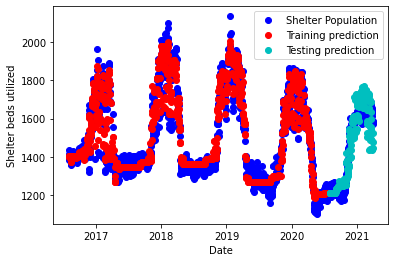

Trained standard deviation = 49.56  (calculated / true average = 1494.99 / 1494.47 and R^2 = 0.95 )
Predicted standard deviation = 73.32  (calculated / true average = 1453.32 / 1450.15 and R^2 = 0.85 )


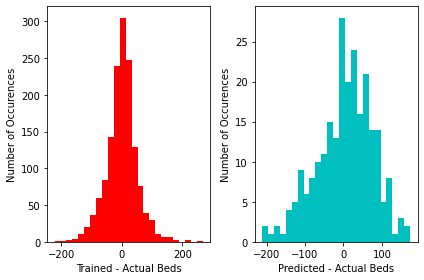

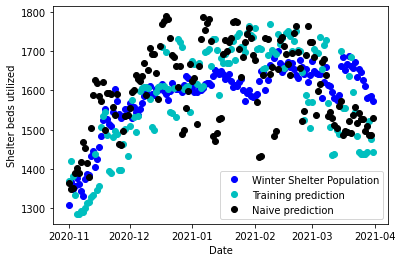

Predicted standard deviation = 87.66  (calculated / true average = 1585.7 / 1588.5 and R^2 = -0.12 )
Naive standard deviation = 101.1  (calculated / true average = 1605.8 / 1588.5 and R^2 = -0.58 )


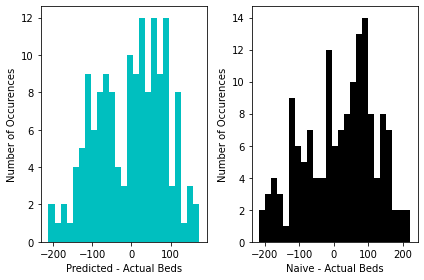

In [41]:
#Here's where users enter their choices
#Year choices: 2018, 2019, 2020, 2021
#Population choices: Total, Male, Female
winter_test_year = 2020
Population_type = 'Total'

SeasonPredictions(winter_test_year, Population_type)

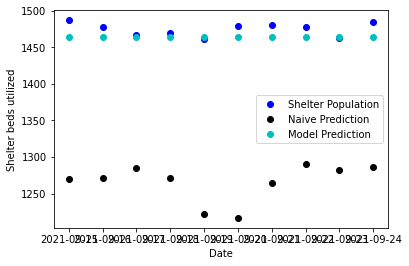

Precicted standard deviation = 13.49  (calculated / true average = 1464.49 / 1475.0 and R^2 = -1.54 )
Naive standard deviation = 210.63  (calculated / true average = 1265.83 / 1475.0 and R^2 = -618.6 )


In [45]:
#Here's where users enter their choice for 10-day predictions
#Year choices: any date between January 2018 and Novemer 2022
#Population choices: Total, Male, Female
Input_Year = 2021
Input_Month = 9
Input_Day = 15
#Population choices: Total, Male, Female
Input_PopulationType = 'Total'

TenDayPredictions(Input_Year, Input_Month, Input_Day, Input_PopulationType, df_use)